Ładowanie bazy danych

In [1]:
wine <- read.csv('wineR3.csv')

In [2]:
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic.acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Acl                 : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Mg                  : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Phenols             : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid.phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanth             : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color.int           : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD                  : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Prol

Statystyka głównych składowych (PCA) ​

In [3]:
wine.PCA <- princomp(wine)
summary(wine.PCA)

Importance of components:
                            Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     314.0775636 13.098369709 3.0785792121 2.252144e+00
Proportion of Variance   0.9980876  0.001735919 0.0000958949 5.132007e-05
Cumulative Proportion    0.9980876  0.999823544 0.9999194388 9.999708e-01
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     1.130736e+00 9.291336e-01 5.342233e-01 3.929461e-01
Proportion of Variance 1.293652e-05 8.734764e-06 2.887623e-06 1.562287e-06
Cumulative Proportion  9.999837e-01 9.999924e-01 9.999953e-01 9.999969e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     3.362951e-01 2.930753e-01 2.143433e-01 1.863628e-01
Proportion of Variance 1.144289e-06 8.690673e-07 4.648520e-07 3.514092e-07
Cumulative Proportion  9.999980e-01 9.999989e-01 9.999994e-01 9.999997e-01
                            Comp.13      Comp.14
Standard deviation     1.4368

In [4]:
colnames(wine)

[1] "Alcohol"              "Malic.acid"           "Ash"                 
 [4] "Acl"                  "Mg"                   "Phenols"             
 [7] "Flavanoids"           "Nonflavanoid.phenols" "Proanth"             
[10] "Color.int"            "Hue"                  "OD"                  
[13] "Proline"              "Wine"

In [17]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ładowanie biblioteki vegan i niezbędnych pakietów do analizy RDA. Wyniki modelowania RDA (wartości własne RDA zmiennych, korelacja r2 z osią PC1 i całego modelu RDA )​

In [19]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-8



In [20]:
wine.rda <- rda(wine ~ Alcohol + Malic.acid + Ash + Acl + Mg + Phenols + Flavanoids + Nonflavanoid.phenols + Proanth + Color.int + Hue + OD + Proline, data = wine, scale = T)

In [21]:
wine.rda

Call: rda(formula = wine ~ Alcohol + Malic.acid + Ash + Acl + Mg + Phenols
+ Flavanoids + Nonflavanoid.phenols + Proanth + Color.int + Hue + OD +
Proline, data = wine, scale = T)

-- Model Summary --

                Inertia Proportion Rank
Total         14.000000   1.000000     
Constrained   13.900089   0.992863   13
Unconstrained  0.099911   0.007137    1

Inertia is correlations

-- Eigenvalues --

Eigenvalues for constrained axes:
 RDA1  RDA2  RDA3  RDA4  RDA5  RDA6  RDA7  RDA8  RDA9 RDA10 RDA11 RDA12 RDA13 
5.521 2.497 1.446 0.927 0.875 0.669 0.553 0.350 0.293 0.259 0.226 0.169 0.115 

Eigenvalues for unconstrained axes:
    PC1 
0.09991 


In [22]:
RsquareAdj(wine.rda)

$r.squared
[1] 0.9928635

$adj.r.squared
[1] 0.9922978

Wykres osypiska RDA i miary modelu RDA (test permutacji, wariancja, wspłczynnik F i poziom istotności)

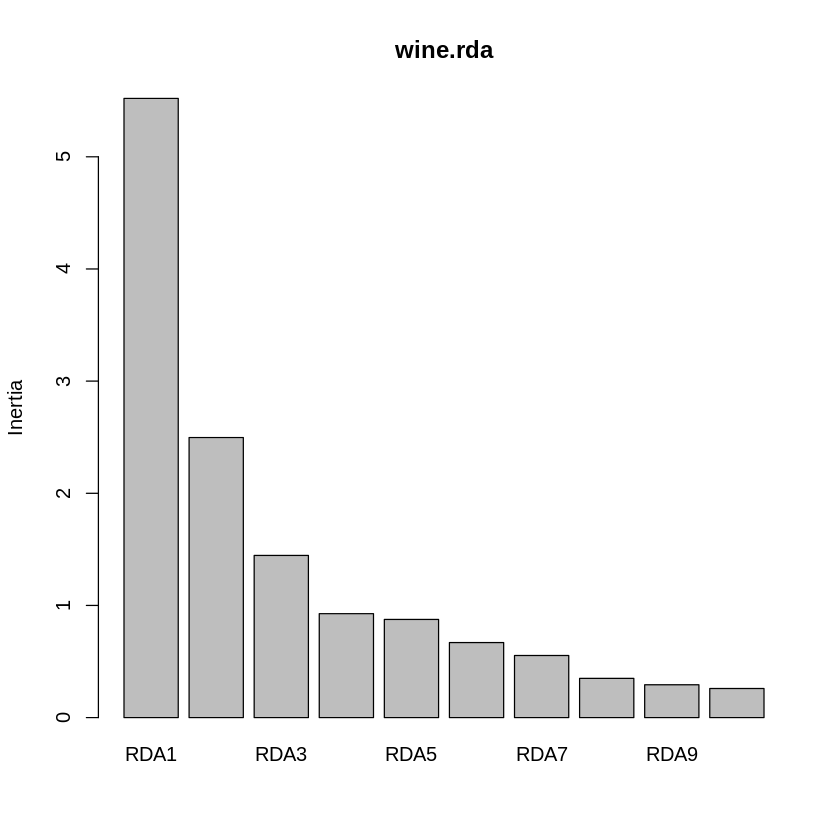

In [23]:
screeplot(wine.rda)

In [24]:
signif.full <- anova.cca(wine.rda, parallel=getOption('mc.cores'))

In [25]:
signif.full

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,13,13.90008886,1755.109,0.001
Residual,164,0.09991114,NA,NA


Diagnostyka modelu. Funkcja vif.cca podaje współczynniki inflacji wariancji dla każdej zmiennej w modelu.

In [26]:
vif.cca(wine.rda)

Alcohol           Malic.acid                  Ash 
            2.460372             1.656647             2.185448 
                 Acl                   Mg              Phenols 
            2.238732             1.417855             4.334519 
          Flavanoids Nonflavanoid.phenols              Proanth 
            7.029350             1.796380             1.975683 
           Color.int                  Hue                   OD 
            3.026304             2.551447             3.785473 
             Proline 
            2.823849

Wykres osi współrzędnych i ordynacji RDA oraz histogramy poszczególnych ordynacji RDA1 - ….RDA13

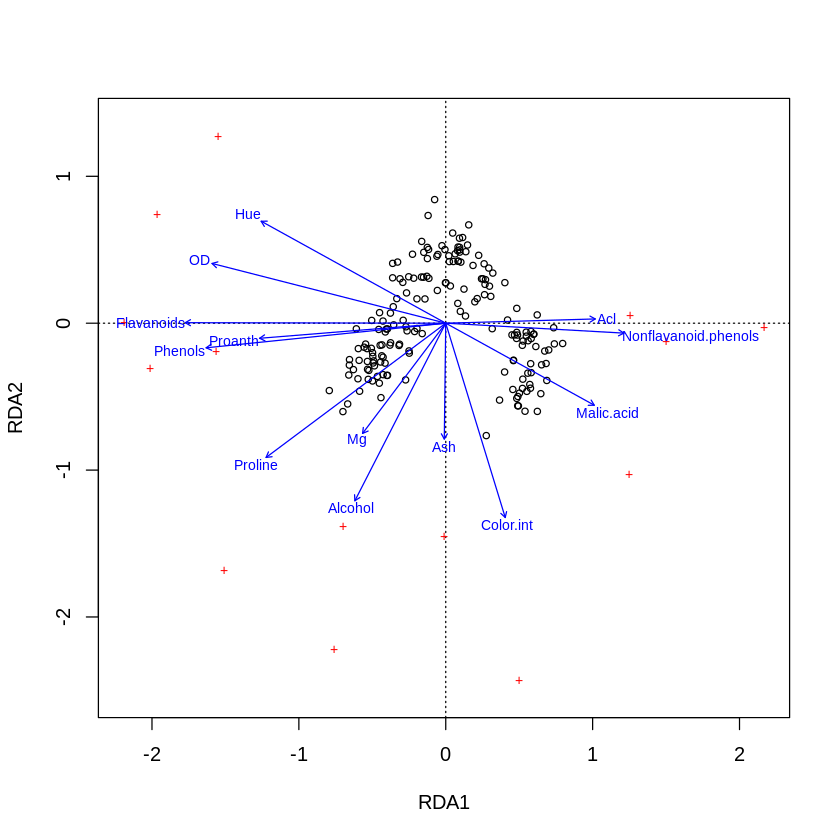

In [27]:
plot(wine.rda, scaling=3)

In [31]:
load.rda <- scores(wine.rda, choices=c(1:3), display='species')

In [37]:
outliers <- function(x, z) {
  lims <- mean(x) + c(-1, 1) * z * sd(x)
  return(x[x < lims[1] | x > lims[2]])
}

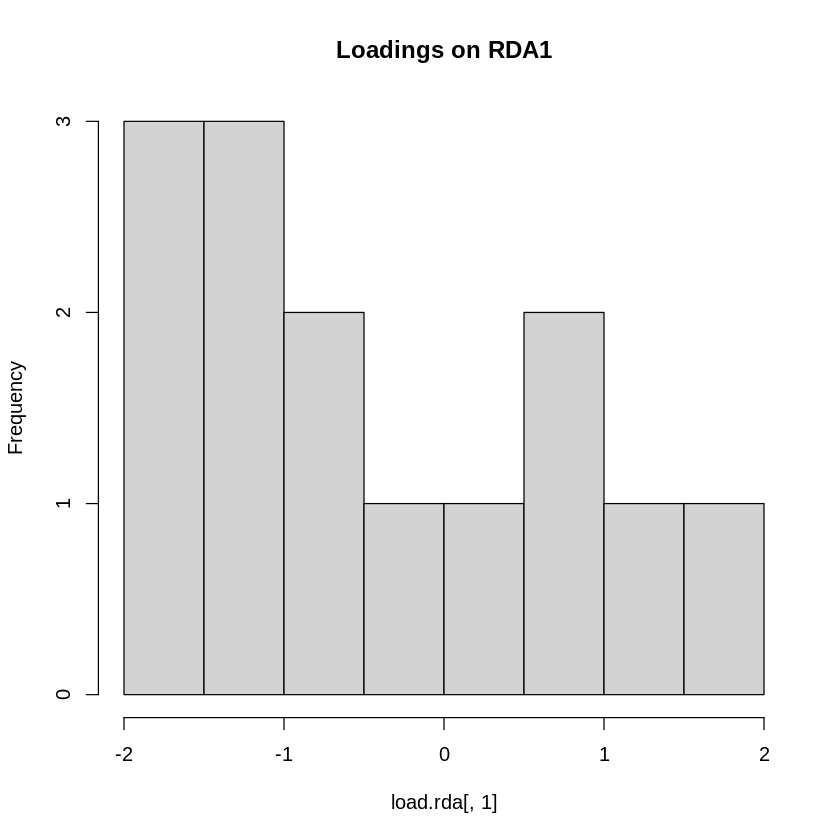

In [38]:
hist(load.rda[,1], main='Loadings on RDA1')

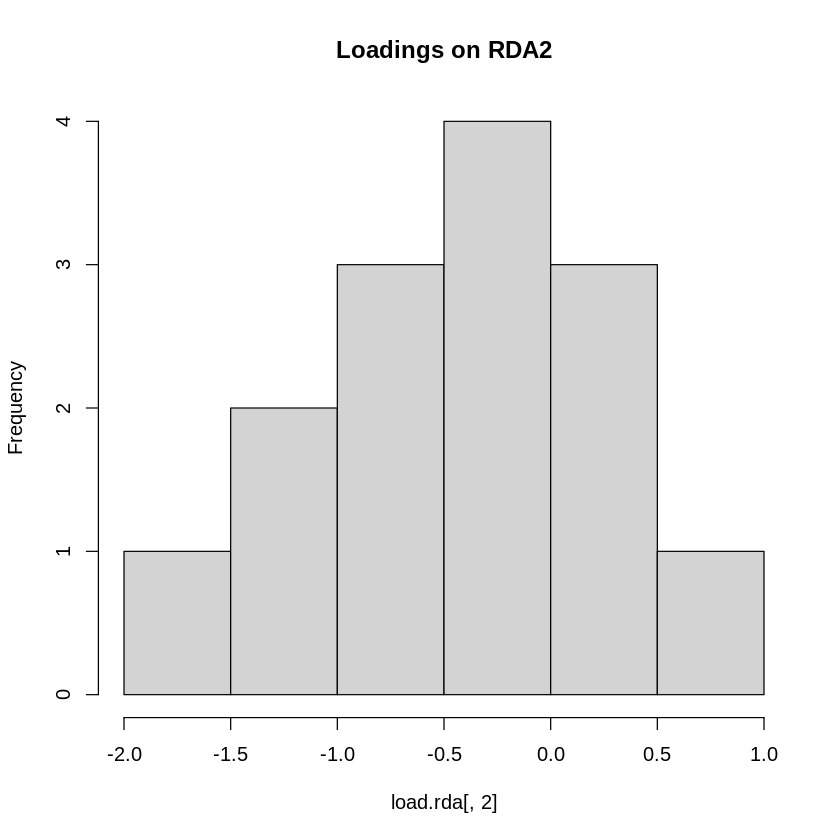

In [39]:
hist(load.rda[,2], main='Loadings on RDA2')